<b><font color = 'Blue'>Prediction Model to detect whether digit is 8 or not</font></b> <br/>
<b><font color = 'Blue'>Algorithm used : Logistic Regression</font></b><br/>
<font color = 'Blue'>Author:Rishabh Sachdeva</font>

In [1]:
import pandas as pd
from urllib.request import urlopen
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

<font color = 'Blue'> Reading data from URLs</font>

In [3]:
urlData = 'https://www.csee.umbc.edu/courses/graduate/691/fall18/data-science/mnist_data.txt'
urlLabels= 'https://www.csee.umbc.edu/courses/graduate/691/fall18/data-science/mnist_labels.txt'
digitFeatures=pd.read_table(urlData,header=None,sep='\s+')
digitLabels=pd.read_table(urlLabels,header=None)

<font color = 'Blue'> Changing the '8' labels to 1, and others to 0. </font>

In [5]:
digitLabels[0] = np.where(digitLabels[0]!=8, 0.0, 1.0)

<font color = 'Blue'> Convert features and labels to numpy arrays</font>

In [7]:
X=np.asarray(digitFeatures)
Y = np.asarray(digitLabels)

In [8]:
np.unique(Y)

array([0., 1.])

Normalizing X for saving computational time.
Doing this, the pixel distribution remains the same

In [9]:
normX=(X/255.0)

In [10]:
#adding bias column
normX = np.insert(normX, 0, values=1, axis=1) 


In [11]:
normX.shape

(10000, 785)

In [12]:
weights=np.zeros(normX.shape[1])

In [13]:
weights=weights.reshape(1,785)

 Visualize one '8' image in the training set

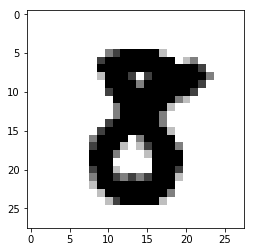

In [14]:
plt.imshow(normX[9991][1:].reshape(28,28),cmap='binary') # not considering bias term

In [15]:
# This function calculates cost corresponding to current weights. 
#Cost depicts how good is the weight vector (less the cost,better the weights).  
# X is feature matrix, Y is label matrix, and weights is Theta Vetors
#returns cost value
def cost_Function(X,Y,weights):
    m = len(weights)
    totalCost=0
    for i in range(10000):
        xi = X[i]
        hi = hypothesis_Function(weights,xi)
        if Y.item(i)==1:
            cost = (-1) * np.log(hi)
        else:
            cost = (-1) * np.log(1-hi)
        totalCost = totalCost + cost ## total error for complete data
    c = totalCost/10000
    return c

In [16]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

In [17]:
def hypothesis_Function(weights,X):
    z=np.dot(weights,X.T)
    return sigmoid(z)

In [18]:
# Entry point for logistic regression algorithm.
# Takes Features, labels, initial weights, alpha and number-of-iterations in arguments.
#Returns final weights after gradient descent is performed.
#num-of-iterations is kept as stopping criteria
def logisticRegression(X,Y,weights,learning_rate,num_iterations):
    for i in range(num_iterations):
        hypothesisPredictions=hypothesis_Function(weights,X)
        errors = Y-hypothesisPredictions.T
        gradient = np.dot(X.T,errors)
        weights = weights + learning_rate*(gradient.T)
        if i%1000 == 0:
            cost = cost_Function(X,Y,weights)
            print(cost,i)#should decrease gradually
    return weights

In [19]:
final_weights=logisticRegression(normX,Y,weights,0.00001,2000)

[0.38842021] 0
[0.13596197] 1000


<b><font color = 'Blue'>The training set accuracy on the 8-vs-others classification problem</font></b>

In [20]:
def find_accuracy(predictions,correct_labels):
    m = len(correct_labels)
    counter=0
    for i in range(m):
        if(correct_labels[i]==predictions[i]):
           # print(predictions[i])
            counter=counter+1
    return (counter/m)*100.0
    

In [24]:
def getAccuracyForDiffNumItersNonRegularized(learning_rate,num_iters):
    accuracySet = []
    for num_iter in num_iters:
        wts = logisticRegression(normX,Y,weights,learning_rate,num_iter)
        prediction = np.round(sigmoid(np.dot(normX,wts.T)))
        accuracy = find_accuracy(prediction,Y)
        print(accuracy,num_iter)
        accuracySet.append(accuracy)
    return accuracySet

In [25]:
predictions = hypothesis_Function(final_weights,normX)
acc = find_accuracy(np.round(predictions.T),Y)
acc

95.97

In [26]:
num_iters = [1000,3000,5000,10000,20000,25000]

<b><font color = 'Blue'>finding accuracy with varying number of iterations</font></b>

In [27]:
accuracy_arr = getAccuracyForDiffNumItersNonRegularized(learning_rate=0.00001,num_iters=num_iters)

[0.38842021] 0
95.48 1000
[0.38842021] 0
[0.13596197] 1000
[0.11986973] 2000
96.25 3000
[0.38842021] 0
[0.13596197] 1000
[0.11986973] 2000
[0.11192968] 3000
[0.10708434] 4000
96.53 5000
[0.38842021] 0
[0.13596197] 1000
[0.11986973] 2000
[0.11192968] 3000
[0.10708434] 4000
[0.10377982] 5000
[0.10136139] 6000
[0.09950175] 7000
[0.09801804] 8000
[0.09679973] 9000
96.67 10000
[0.38842021] 0
[0.13596197] 1000
[0.11986973] 2000
[0.11192968] 3000
[0.10708434] 4000
[0.10377982] 5000
[0.10136139] 6000
[0.09950175] 7000
[0.09801804] 8000
[0.09679973] 9000
[0.09577603] 10000
[0.0948995] 11000
[0.09413715] 12000
[0.09346533] 13000
[0.09286665] 14000
[0.09232803] 15000
[0.09183946] 16000
[0.0913931] 17000
[0.09098275] 18000
[0.09060345] 19000
96.72 20000
[0.38842021] 0
[0.13596197] 1000
[0.11986973] 2000
[0.11192968] 3000
[0.10708434] 4000
[0.10377982] 5000
[0.10136139] 6000
[0.09950175] 7000
[0.09801804] 8000
[0.09679973] 9000
[0.09577603] 10000
[0.0948995] 11000
[0.09413715] 12000
[0.09346533] 13

<b><font color = 'Blue'>Accuracy Vs Num-of-iterations plot for non-regualized logistic regression</font></b>

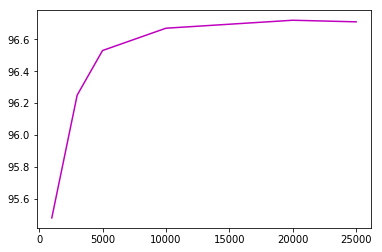

In [34]:
plt.plot(num_iters,accuracy_arr,'m')

<b><font color = 'Blue'>28x28 weight image for non-regularized logistic regression. </font><br>
The weight vector forms a rough 8 like figure. The more importance is given to vectors forming the boundry of 8 like figure and lesser to the other pixels. Hence, prediction or hypthosis is calculated by multiplying a bigger factor to pixels of features which are dark in color, and smaller factor to other lighter ones. </b>

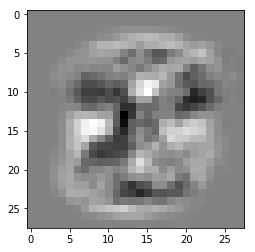

In [35]:
plt.imshow(final_weights[0][1:785].reshape(28,28),cmap='binary')

Trying to check hypothsis of 9991th row in feature set, which depicts to label - 8. Ideally it should be near to 1. Our model predicts this feature vector to represent '8' by 79.7 per cent

In [39]:
sigmoid(normX[9991].dot(final_weights.T))

array([0.79709623])

In [40]:
def logisticRegressionRegularized(X,Y,weights,learning_rate,num_iterations,reg_term):
    for i in range(num_iterations):
        hypothesisPredictions=hypothesis_Function(weights,X)
        errors = Y-hypothesisPredictions.T
        gradient = np.dot(X.T,errors) + reg_term*(weights.T) # considering derivative of regularization term: lambda*wt^2
        weights = weights + learning_rate*(gradient.T)
        if i%500 == 0:
            cost = cost_Function(X,Y,weights)
            print(cost,i)#should decrease gradually
    return weights

In [41]:
final_weights_reg=logisticRegressionRegularized(normX,Y,weights,0.00001,1000,10)

[0.38842021] 0
[0.15320277] 500


## Accuracy for regualrized logistic regression

In [179]:

predictionsReg = np.round(sigmoid(np.dot(normX,final_weights_reg.T)))
accu = find_accuracy(predictionsReg,Y)
accu

95.49

<b><font color = 'Blue'> 28x28 image of the learned weights, with regularized logistic regression. </font> <br>The largest weight should map to dark colored pixels, the smallest weight to lighter ones, and the other weights should linearly interpolate between those extremes.
The weight vector forms a rough 8 like figure. Given any feature vector, the more importance is given to those boundry pixels (darker ones in below image), and less to the lighter ones. Given any feature vector, hypthosis is calculated by multiplying a bigger factor to pixels of features which are darker, and smaller factor to other lighter ones. 
</b>

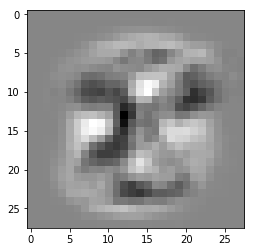

In [42]:
plt.imshow(final_weights_reg[0][1:785].reshape(28,28),cmap='binary') # slicing reguired to remove biased attribute in feature vector

In [43]:
def getAccuracyForDiffLambda(lambda_array,learning_rate,num_iters):
    accuracySet = []
    for reg_term in lambda_array:
        wts = logisticRegressionRegularized(normX,Y,weights,learning_rate,num_iters,reg_term)
        prediction_reg = np.round(sigmoid(np.dot(normX,wts.T)))
        accuracy = find_accuracy(prediction_reg,Y)
        print(accuracy,reg_term)
        accuracySet.append(accuracy)
    return accuracySet

In [47]:
lambda_array = [0.1,5,10,100,500,1000]
accuracy_array_reg=getAccuracyForDiffLambda(lambda_array,learning_rate=0.00001,num_iters=3000)

[0.38842021] 0
[0.15426664] 500
[0.13594329] 1000
[0.12619166] 1500
[0.11983693] 2000
[0.11530484] 2500
96.25 0.1
[0.38842021] 0
[0.1537379] 500
[0.13503419] 1000
[0.12492371] 1500
[0.11824909] 2000
[0.11343827] 2500
96.3 5
[0.38842021] 0
[0.15320277] 500
[0.13412126] 1000
[0.12365888] 1500
[0.11667987] 2000
[0.11161857] 2500
96.34 10
[0.38842021] 0
[0.1448893] 500
[0.12514833] 1000
[0.12380992] 1500
[0.14313503] 2000
[0.19096926] 2500
96.2 100
[0.38842021] 0
[0.26685601] 500


C:\Users\Rishabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


[inf] 1000


C:\Users\Rishabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


[inf] 1500
[inf] 2000
[inf] 2500
94.75 500
[0.38842021] 0
[inf] 500
[inf] 1000
[inf] 1500
[inf] 2000
[inf] 2500
94.03 1000


<b><font color='Blue'>The curve of training set accuracy as a function of lambda.</font> <br>
 When lambda value is very low, there is a risk of overfitting. Hence, the generated model will perform poorly with unseen data.
If the lambda value is very high, there is a risk of underfitting. So, model is not able to learn much about the training data.
    
When lambda value is increased, more emphasis is given to small weights.    
In the plot drawn below, when lambda increases significatly, it performs poorly on training data. Hence, this is the scenario of underfitting. So, model is not aware about peculiarities of training data, and gives poor accuracy.
The Ideal Value of lambda depends on data, so some tuning is required to get the correct balance between generalization and training data.
</b>

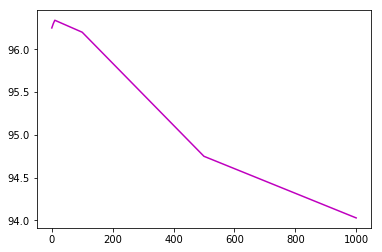

In [48]:
plt.plot(lambda_array,accuracy_array_reg,'m')

In [588]:
def getAccuracyForDiffNumIters(reg_term,learning_rate,num_iters):
    accuracySet = []
    for num_iter in num_iters:
        wts = logisticRegressionRegularized(binaryX,Y,weights,learning_rate,num_iter,reg_term)
        prediction_reg = np.round(sigmoid(np.dot(binaryX,wts.T)))
        accuracy = find_accuracy(prediction_reg,Y)
        print(accuracy,num_iter)
        accuracySet.append(accuracy)
    return accuracySet

In [592]:
accuracy_array_iters=getAccuracyForDiffNumIters(0.1,learning_rate=0.000001,num_iters=num_iters)

92.75999999999999 1000
93.49 3000
93.84 5000
94.08999999999999 10000
94.25 20000
94.28999999999999 25000


<b><font color='Blue'> Accuracy VS Num-of-Iterations for regularized Logistic Regression </font></b>

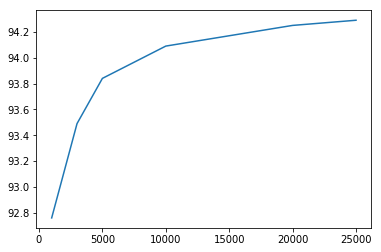

In [593]:
plt.plot(num_iters,accuracy_array_iters)